# 03 - EDA

In [1]:
import sys
sys.executable

'/usr/local/bin/python'

## Imports

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import constants as cnst
import stock_utils as su

pd.set_option('display.max_columns', None)

NSE_DATA_DIR = PosixPath('../data/NSE') | Valid: True
PROCESSED_DATA_DIR = PosixPath('../data/processed') | Valid: True


## Constants

In [3]:
stock_symbols = su.get_all_stock_symbols(
    cnst.NSE_DATA_DIR
)

stock_symbols

['DEEPAKFERT', 'HDFCBANK', 'INDIGOPNTS', 'ITBEES', 'JUBLFOOD']

In [4]:
STOCK_SYMBOL = stock_symbols[2]

STOCK_SYMBOL

'INDIGOPNTS'

## Data loading

### Stock data

In [5]:
stock_data = su.StockData(STOCK_SYMBOL)
stock_data

Symbol: INDIGOPNTS
Total records: 760
First record: 2021-02-02
Last record: 2024-02-23

## Statistical analysis

### Historical

#### Candle type

##### Overall proportion

In [6]:
stock_data.processed['IsGreen'].value_counts(normalize = True).mul(100).round(2)

IsGreen
0    67.11
1    32.89
Name: proportion, dtype: float64

##### By year

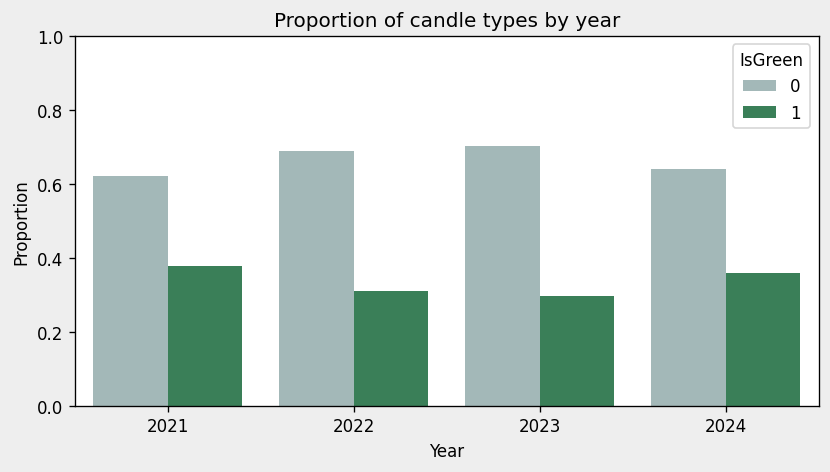

In [7]:
plt.figure(figsize = (8, 4), dpi = 120, facecolor = "#eee")
# plt.axes().set_facecolor("#ddd")
sns.barplot(
    data = stock_data.processed.groupby(
        'Year', as_index = False
    )['IsGreen'].value_counts(normalize = True),
    x = "Year",
    y = "proportion",
    hue = "IsGreen",
    palette = "blend:#9fbcbb,seagreen"
)
plt.ylim((0, 1))
plt.ylabel("Proportion")
plt.title("Proportion of candle types by year")
plt.show()

##### By quarter

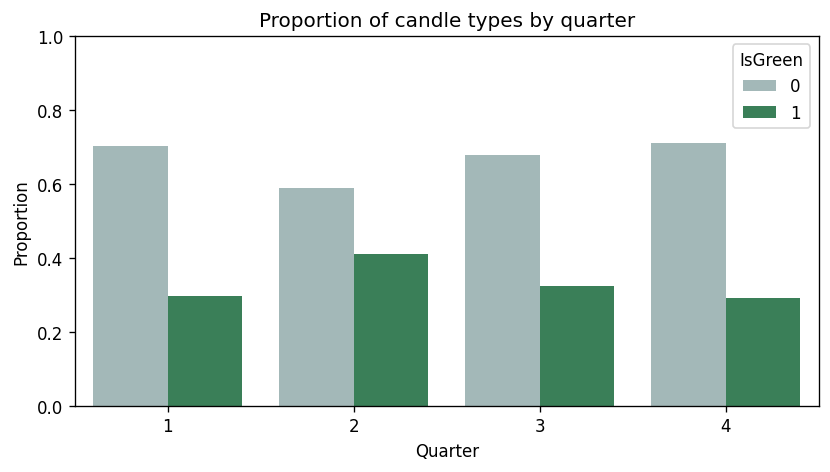

In [8]:
plt.figure(figsize = (8, 4), dpi = 120)
sns.barplot(
    data = stock_data.processed.groupby(
        'Quarter', as_index = False
    )['IsGreen'].value_counts(normalize = True),
    x = "Quarter",
    y = "proportion",
    hue = "IsGreen",
    palette = "blend:#9fbcbb,seagreen"
)
plt.ylim((0, 1))
plt.ylabel("Proportion")
plt.title("Proportion of candle types by quarter")
plt.show()

#### NATR

##### By candle type

In [9]:
stock_data.processed['NATR'] = (
    (
        stock_data.processed['Close'] - stock_data.processed['Open']
    ) / stock_data.processed['Open']
) * 100

stock_data.processed.groupby('IsGreen')[['NATR']].describe().round(2)

NATR                                           
         count  mean   std   min   25%   50%   75%    max
IsGreen                                                  
0        510.0 -1.26  1.11 -9.72 -1.68 -1.01 -0.50  -0.00
1        250.0  1.42  1.98  0.00  0.32  0.79  1.92  19.55

### Current

#### First hit of current price

In [10]:
stock_data.get_first_hit(
    stock_data.processed.iloc[-1]["Close"]
)

Target: 1443.5
First hit: 2021-02-02 | 1117 days ago
'Close' at first hit: 3117.15
Total hits: 544


### Trends